# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [21]:
#disaster_response.db is the name of the file
engine = create_engine('sqlite:///disaster_response.db')
#DisasterResponse is the table name
df =  pd.read_sql_table("DisasterResponse.db", con=engine)


Quoting the project description: " uses the 'message' column to predict classifications". Therefore, the feature column (X) is the 'message' column.

In [22]:
#define feature columns
X = df['message'].values

#define the target columns
y = df[df.columns[4::]]

check out X and y

In [23]:
X[0:5]

array(['Weather update - a cold front from Cuba that could pass over Haiti',
       'Is the Hurricane over or is it not over',
       'Looking for someone but no name',
       'UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.',
       'says: west side of Haiti, rest of the country today and tonight'],
      dtype=object)

In [24]:
y.sample(3)

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
14130,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
15892,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
14914,1,0,0,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


Before we can classify any posts, we'll need to clean and tokenize the text data. Use what you remember from the last lesson on NLP to implement the function tokenize. This function should perform the following steps on the string, text, using nltk:


1. Split text into tokens.

2. For each token: lemmatize, normalize case, and strip leading and trailing white space.

3. Return the tokens in a list!

Before we create a functions, I want to try everything out with 5 values X[:5]

In [25]:
for text in X[:5]:
    #tokenize text
    tokens = word_tokenize(text)
    print(text)
    print(tokens, '\n')

    #initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    #iterate through each token and lemmatize
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

Weather update - a cold front from Cuba that could pass over Haiti
['Weather', 'update', '-', 'a', 'cold', 'front', 'from', 'Cuba', 'that', 'could', 'pass', 'over', 'Haiti'] 

Is the Hurricane over or is it not over
['Is', 'the', 'Hurricane', 'over', 'or', 'is', 'it', 'not', 'over'] 

Looking for someone but no name
['Looking', 'for', 'someone', 'but', 'no', 'name'] 

UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.
['UN', 'reports', 'Leogane', '80-90', 'destroyed', '.', 'Only', 'Hospital', 'St.', 'Croix', 'functioning', '.', 'Needs', 'supplies', 'desperately', '.'] 

says: west side of Haiti, rest of the country today and tonight
['says', ':', 'west', 'side', 'of', 'Haiti', ',', 'rest', 'of', 'the', 'country', 'today', 'and', 'tonight'] 



This looks good!

### 2. Write a tokenization function to process your text data

In [26]:
def tokenize(text):

    #split text into tokens
    tokens = word_tokenize(text)
    #create WordNetLemmatizer instance
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [27]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

Code from [12. Solution: Build Pipeline](https://learn.udacity.com/nanodegrees/nd025/parts/cd0018/lessons/ls12134/concepts/69d31784-4a2c-4836-b9ff-c00d04eb40b2)

In [28]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [30]:
pipeline.fit(X_train, y_train)

/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KeyboardInterrupt: 

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [ ]:
y_pred = pipeline.predict(X_test)

The 'related' column is y_pred[:,0] which is basically the first column of the array.

In [ ]:
y_pred[:,0]

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test["related"], y_pred[:,0]))

              precision    recall  f1-score   support

           0       0.74      0.27      0.39      1541
           1       0.81      0.97      0.88      4964
           2       0.50      0.20      0.29        49

    accuracy                           0.80      6554
   macro avg       0.68      0.48      0.52      6554
weighted avg       0.79      0.80      0.76      6554



In [ ]:
y_pred.shape

(6554, 36)

For each column, a classification matrix has to be build with the corresponding column of the array. This can easiest be done with enumerate(). Code from [stephanieirvine](https://github.com/stephanieirvine/Udacity-Data-Scientist-Nanodegree/blob/main/Project%202/ML%20Pipeline%20Preparation.ipynb).

In [ ]:
for index, column in enumerate(y_test.columns[0:5]):
    print(index, column)

0 related
1 request
2 offer
3 aid_related
4 medical_help


In [ ]:
def test_model(y_test, y_pred):
    
    """
    Function to iterate through columns and print sklearn classification report for each column respectively.
    """
    for index, column in enumerate(y_test):
        print(column, classification_report(y_test[column], y_pred[:, index]))

### 6. Improve your model
Use grid search to find better parameters. 

In [ ]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(tokenizer=<function tokenize at 0x7efbcc2e9040>)),
  ('tfidf', TfidfTransformer()),
  ('clf', MultiOutputClassifier(estimator=RandomForestClassifier()))],
 'verbose': False,
 'vect': CountVectorizer(tokenizer=<function tokenize at 0x7efbcc2e9040>),
 'tfidf': TfidfTransformer(),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier()),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': <function __main__.tokenize(text)>,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf_

In [ ]:
parameters = {
    'clf__estimator__n_estimators': [100, 150]
    }
cv = GridSearchCV(pipeline, param_grid=parameters)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
cv.fit(X_train, y_train)

/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' w

KeyboardInterrupt: 

In [ ]:
cv.best_params_

{'clf__estimator__n_estimators': 200}

In [ ]:
y_pred = cv.predict(X_test)

In [ ]:
test_model(y_test, y_pred)

related               precision    recall  f1-score   support

           0       0.75      0.27      0.40      1524
           1       0.81      0.97      0.88      4977
           2       0.80      0.08      0.14        53

    accuracy                           0.80      6554
   macro avg       0.78      0.44      0.47      6554
weighted avg       0.79      0.80      0.76      6554

request               precision    recall  f1-score   support

           0       0.90      0.99      0.94      5442
           1       0.91      0.44      0.60      1112

    accuracy                           0.90      6554
   macro avg       0.90      0.72      0.77      6554
weighted avg       0.90      0.90      0.88      6554

offer               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6524
           1       0.00      0.00      0.00        30

    accuracy                           1.00      6554
   macro avg       0.50      0.50      0.50      655

/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

In [ ]:
import pickle

In [ ]:
filename = 'model.pkl'
pickle.dump(cv, open(filename, 'wb'))

NameError: name 'cv' is not defined

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

### 11. Visualisation

In [38]:
import matplotlib.pyplot as plt
import seaborn as sb

In [47]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
base_color = sb.color_palette()[0]
def creat_count_plot(plt_title:str, df:pd.DataFrame, plotted_column:str):
    """
    plt_title: Title of the plot
    df: DataFrame
    plotted_column: column to be plotted

    Plots a count plot with above arguments
    """
    plt.figure(figsize = [10, 5]) 
    
    plt.title(plt_title)
    sb.countplot(data = df, y = plotted_column, color = base_color,
             #order = df[plotted_column].value_counts().index
             )

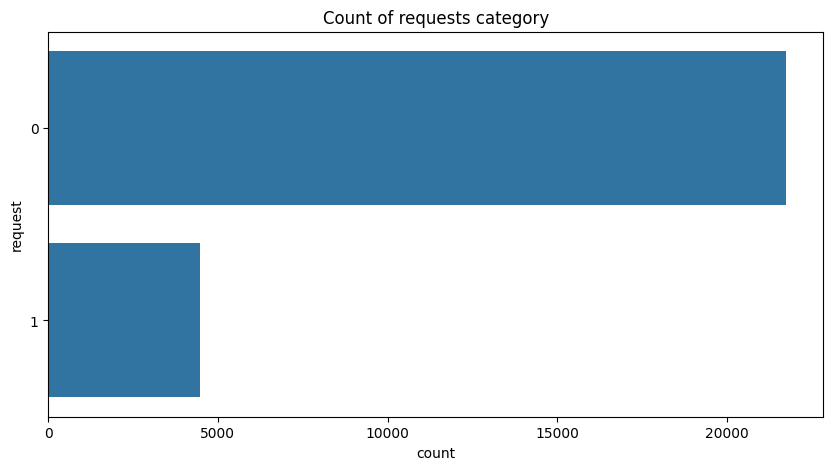

In [45]:
creat_count_plot("Count of requests category", df, "request")

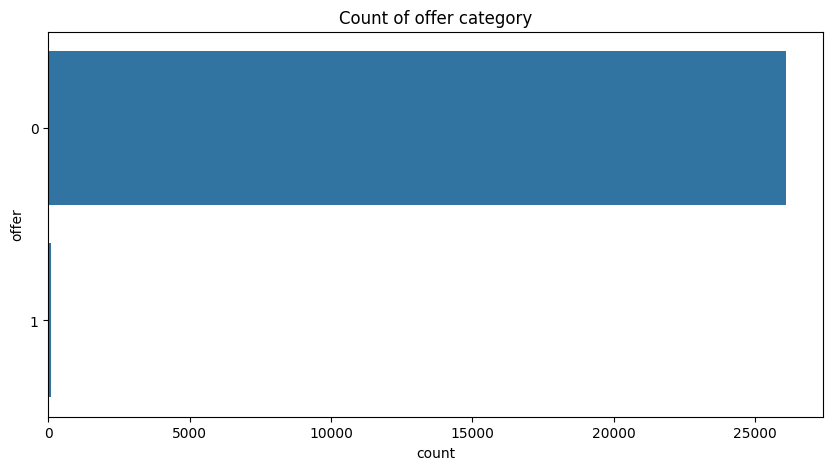

In [72]:
creat_count_plot("Count of offer category", df, "offer")